In [1]:
#installing packages
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install tabulate
!pip install seaborn
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 70.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 76.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 46.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 32.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 79.6 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 80.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 6.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.5 MB/s eta 0:00:00


In [2]:
#import packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import datetime
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from datetime import timedelta, date
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz 
from matplotlib import pyplot as plt
from sklearn import tree
import zipfile
import seaborn as sns
import os
import gc
gc.collect()

0

In [3]:
#Defining Assining_Variables()
def Assining_Variables():
    fle1 = "Country-Code.csv"
    fle2 = "variable description.csv"
    fle3 = "rest_data.csv"
    return fle1,fle2,fle3

In [4]:
#Defining load_dataset()
def load_dataset(fle1,fle2,fle3):
    df_air_visit_data = pd.read_csv(fle1, encoding='latin-1')
    df_air_reserve = pd.read_csv(fle2,encoding='latin-1')
    df_air_store_info = pd.read_csv(fle3,encoding='latin-1')
    return df_air_visit_data,df_air_reserve,df_air_store_info

In [5]:
#Defining Counting_NAN_Values()
def Counting_NAN_Values(dfff):
        df_nan = pd.DataFrame(columns=['Nan count'])
        nan_col = list(dfff.columns.tolist())
        total_nan = 0
        for col in nan_col:
            nan_cnt = dfff[col].isnull().sum()
            df_nan.loc[col] = nan_cnt
            total_nan += nan_cnt
        print(tabulate(df_nan, headers = 'keys', tablefmt = 'psql'))
        return df_nan['Nan count']

In [6]:
#Defining Dataset_Cleaning()
def Dataset_Cleaning(dff):
        dfff = dff.isna().sum().sum()
        print("Total NAN values are : {0}".format(dfff))
        dff_nan = dff[pd.isnull(dff).any(axis=1)]
        print("Data with at least 1 NAN values: {0}".format(len(dff_nan.index)))
        df_nan_all = dff[pd.isnull(dff).all(1)]
        print("Rows filled NAN data: {0}".format(len(df_nan_all.index)))
        df_air_store = dff['Restaurant ID'].isnull().sum()
        df_hpg_store = dff['Country Code'].isnull().sum()
        print("Count of NAN values on Restaurant ID  are: {0}".format(df_air_store))
        print("Count of NAN values on Country Code are: {0}".format(df_hpg_store))
        nan_ids_df = dff[dff['Restaurant ID'].isnull() & dff['Country Code'].isnull()]
        len_invalid_id = len(nan_ids_df.index)
        print("Number of Invalid IDs (both Restaurant ID & Country Code) are : {0}".format(len_invalid_id))
        df_nadn = Counting_NAN_Values(dff)
        return dfff,df_nadn

In [7]:
#Defining Nan_Percent_Computation()
def Nan_Percent_Computation(dffff):
        nan_values_cnt,df_nafn = Dataset_Cleaning(dffff)
        total_values_cnt = dffff.shape[0]*dffff.shape[1]
        print("Total Values' Counts are : {0}".format(total_values_cnt))
        total_correct_values_cnt = (total_values_cnt - nan_values_cnt)
        print("Total Correct Values' Counts are : {0}".format(total_correct_values_cnt))
        return total_correct_values_cnt,nan_values_cnt,df_nafn

In [8]:
#Defining Pie_Chart_NAN_Column_Plotting()
def Pie_Chart_NAN_Column_Plotting(dft_val1,dfg,total_crt_value_cnt,nan_value_cnt):
    dft = pd.DataFrame({'Data': ['Correct Values', 'NAN Values'],
                          'ValueCount': [total_crt_value_cnt,nan_value_cnt]})
        # Plotting the pie chart for above dataframe
    #dft.groupby(['Data']).sum().plot(kind='pie', y='Value Count', autopct='%1.0f%%')
    # Data to plot
    lab1 = dft.Data.values
    sdd = dft.ValueCount.values
    #sizes = [215, 130,215, 130,215, 130]
    color = ['lightcoral', 'lightskyblue']
    explode1 = (0.1, 0)  # explode 1st slice
    # Plot
    plt.pie(sdd, explode=explode1, labels=lab1, colors=color,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()

In [9]:
#Defining Final_Dataset()
def Final_Dataset():
        fle1,fle2,fle3 = Assining_Variables()
        df_air_visit_data,df_air_reserve,df_air_store_info = load_dataset(fle1,fle2,fle3)
        h1,t1 = os.path.split(fle1)
        h2,t2 = os.path.split(fle2)
        h3,t3 = os.path.split(fle3)
        print("The shape of {0} is {1}".format(t1,df_air_visit_data.shape),end="\n")
        print("The shape of {0} is {1}".format(t2,df_air_reserve.shape),end="\n")
        print("The shape of {0} is {1}".format(t3,df_air_store_info.shape),end="\n")
        """df_air_visit_data = df_air_visit_data.reset_index()
        df_air_reserve = df_air_reserve.reset_index()
        df_air_store_info = df_air_store_info.reset_index()
        df_date_info = df_date_info.reset_index()"""
        df_n = pd.merge(df_air_visit_data,df_air_store_info,on='Country Code',how="outer")
        df = pd.concat([df_n,df_air_reserve], axis=0, join="outer")
        print(df)
        print(df.shape)
        return df

In [10]:
#Calling Final_Dataset()
df = Final_Dataset()

The shape of Country-Code.csv is (15, 2)
The shape of variable description.csv is (19, 2)
The shape of rest_data.csv is (9551, 19)
    Country Code Country  Restaurant ID  \
0            1.0   India         2701.0   
1            1.0   India       309548.0   
2            1.0   India         2742.0   
3            1.0   India       301523.0   
4            1.0   India         2724.0   
..           ...     ...            ...   
14           NaN     NaN            NaN   
15           NaN     NaN            NaN   
16           NaN     NaN            NaN   
17           NaN     NaN            NaN   
18           NaN     NaN            NaN   

                               Restaurant Name       City  \
0            Orient Express - Taj Palace Hotel  New Delhi   
1     Tian - Asian Cuisine Studio - ITC Maurya  New Delhi   
2                         Bukhara - ITC Maurya  New Delhi   
3   Nostalgia at 1911 Brasserie - The Imperial  New Delhi   
4                          1911 - The Imperial 

<AxesSubplot:>

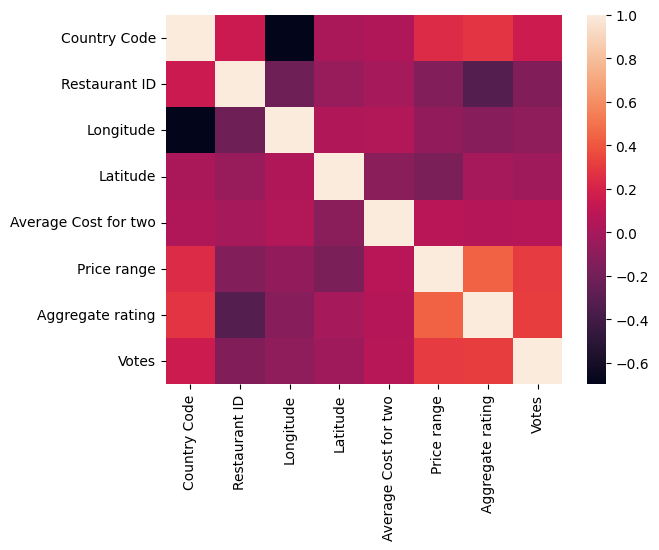

In [11]:
sns.heatmap(df.corr())

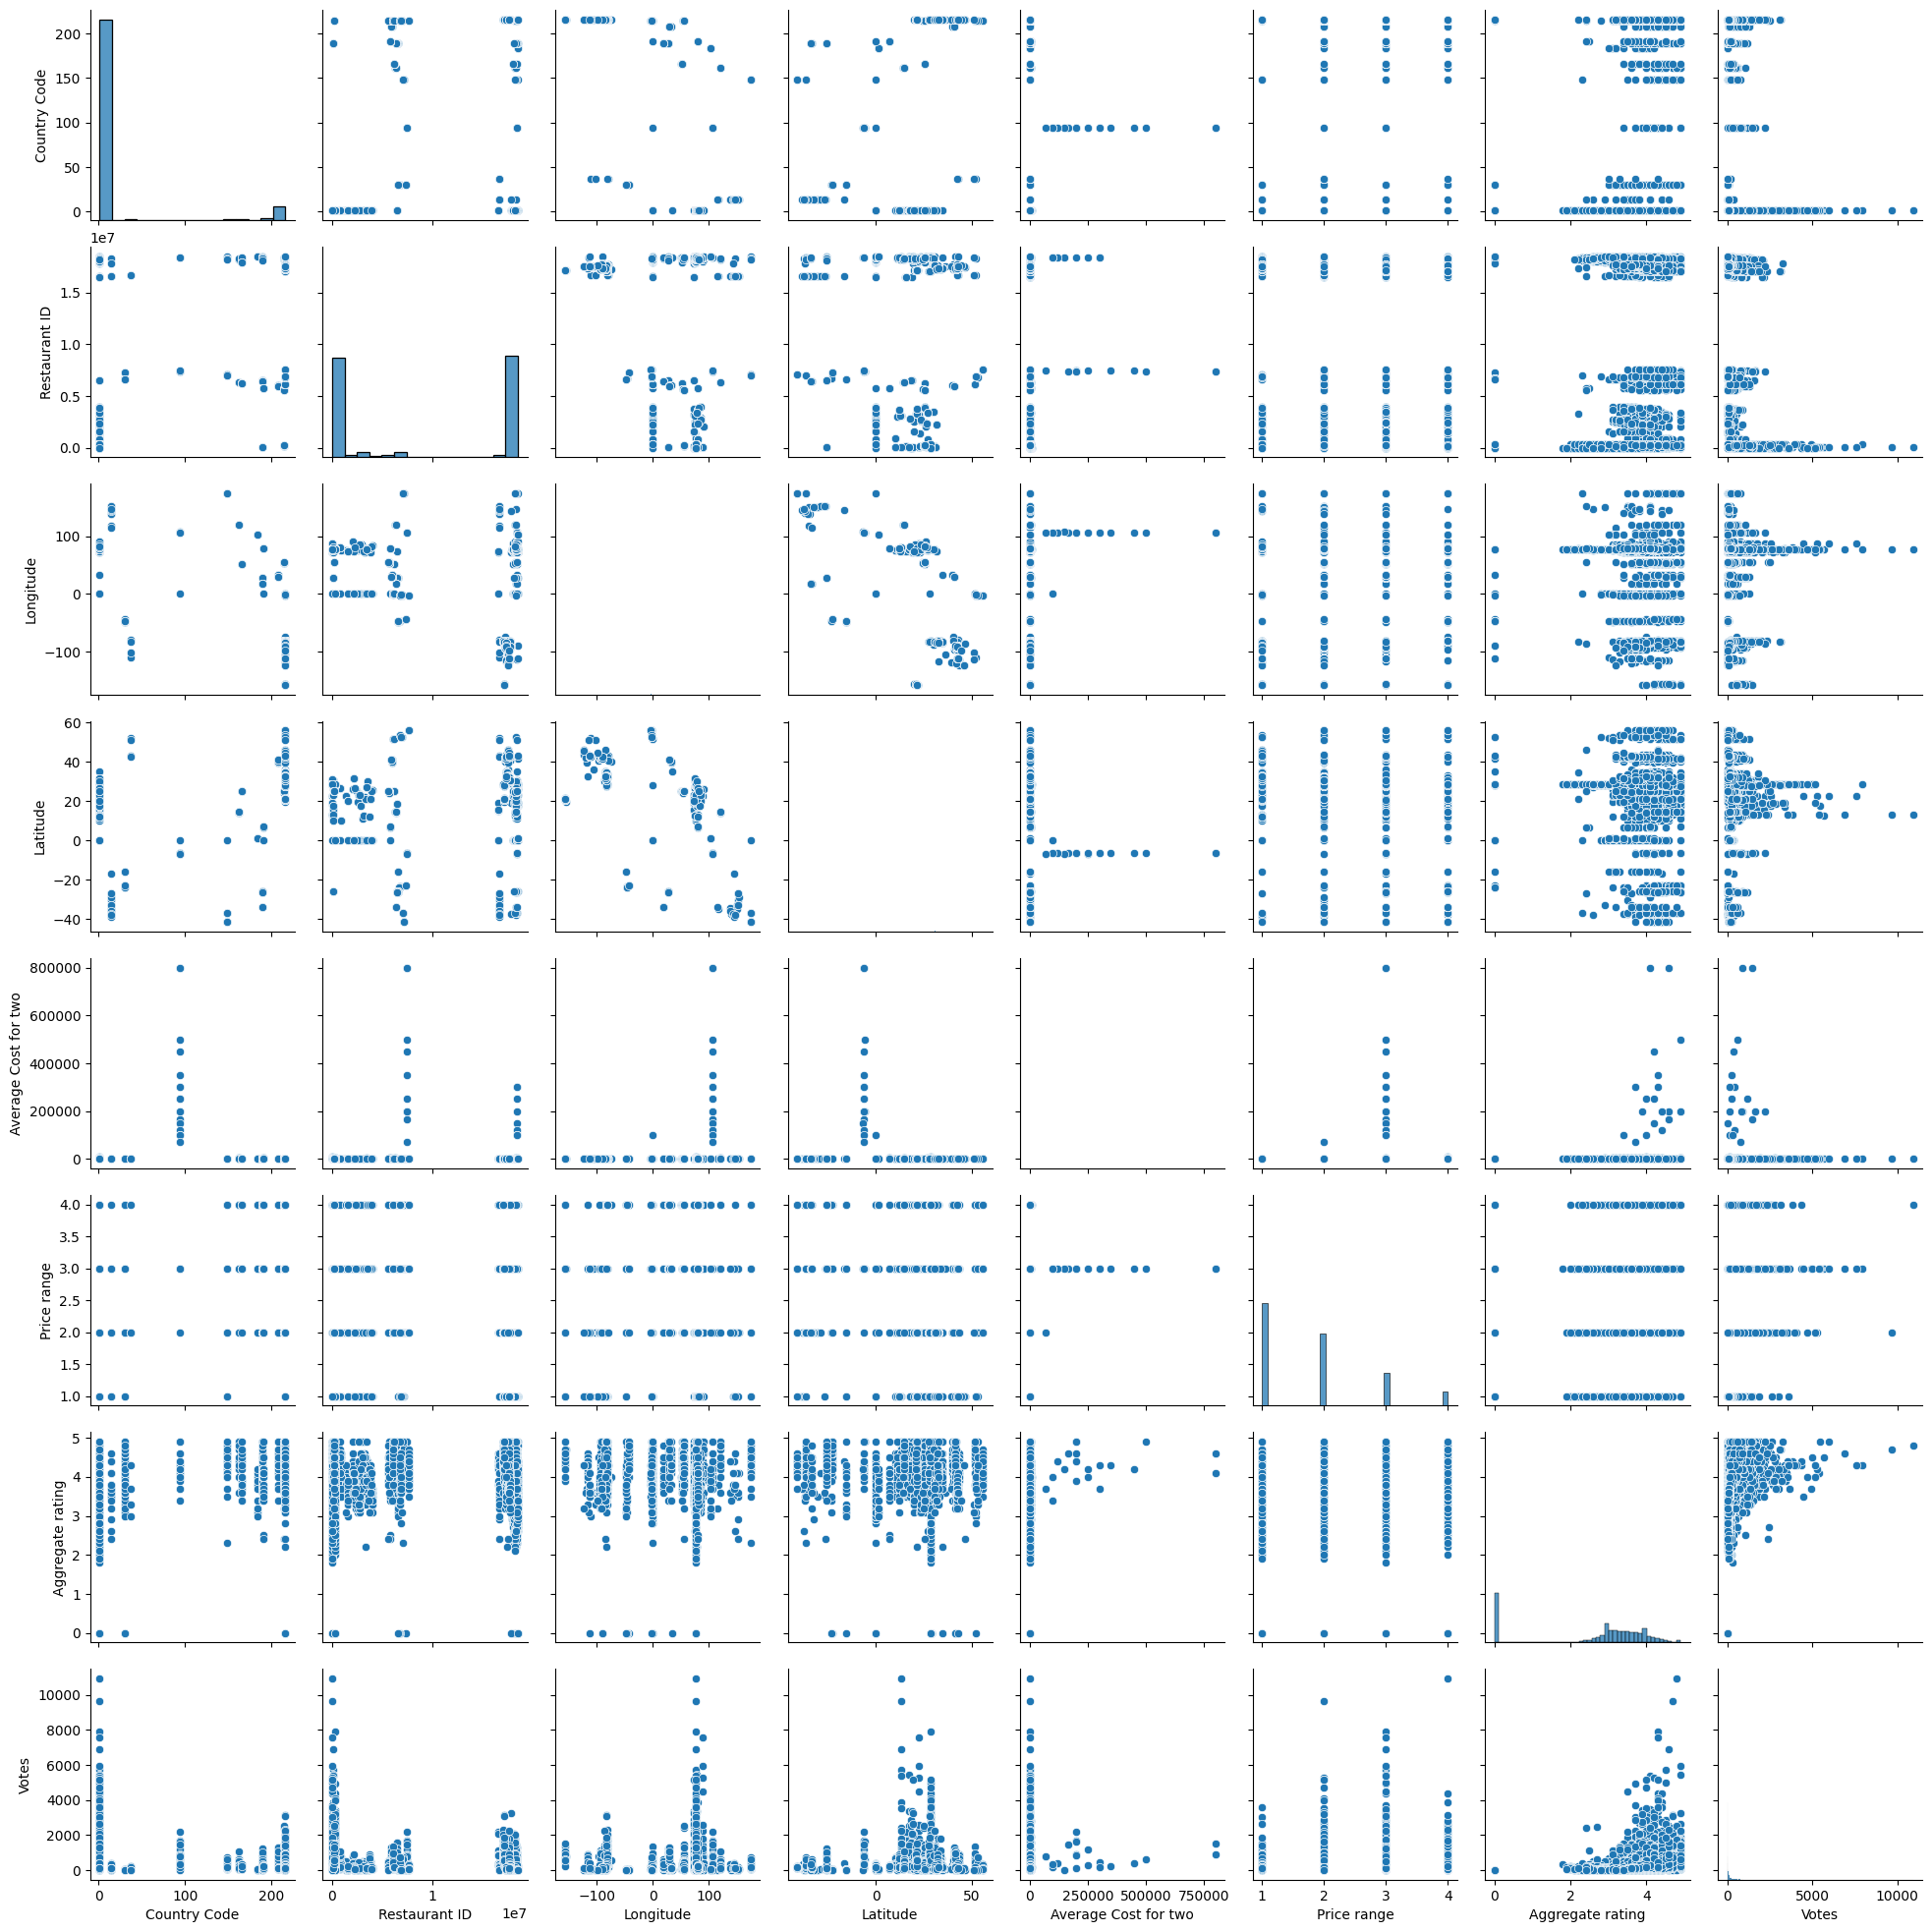

In [12]:
sns.pairplot(df)

<AxesSubplot:>

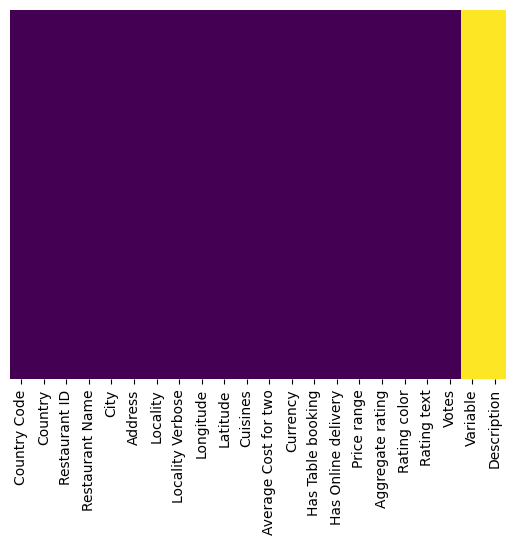

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
df.describe()

Country Code  Restaurant ID    Longitude     Latitude  \
count   9551.000000   9.551000e+03  9551.000000  9551.000000   
mean      18.365616   9.051128e+06    64.126574    25.854381   
std       56.750546   8.791521e+06    41.467058    11.007935   
min        1.000000   5.300000e+01  -157.948486   -41.330428   
25%        1.000000   3.019625e+05    77.081343    28.478713   
50%        1.000000   6.004089e+06    77.191964    28.570469   
75%        1.000000   1.835229e+07    77.282006    28.642758   
max      216.000000   1.850065e+07   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9570 entries, 0 to 18
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   float64
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   float64
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   float64
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Price range           9

In [16]:
!pip install pandas_profiling
import pandas_profiling
pandas_profiling.ProfileReport(df)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.3/315.3 kB 6.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.3/596.3 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 690.3/690.3 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 61.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 73.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
!pip install sweetviz
my_report  = sweetviz.analyze([df,'Train'], target_feat='Restaurant Name')
my_report.show_html('FinalReport.html')

NameError: name 'sweetviz' is not defined

In [20]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df1 = AV.AutoViz('rest_data.csv')
df1

    pandas ascii encoder does not work for this file. Continuing...
    pandas utf-8 encoder does not work for this file. Continuing...
    pandas iso-8859-1 encoder does not work for this file. Continuing...
    pandas cp1252 encoder does not work for this file. Continuing...
    pandas latin1 encoder does not work for this file. Continuing...
Not able to read or load file. Please check your inputs and try again...


In [22]:
sns.boxplot(data=df, orient='v')

<AxesSubplot:>

In [25]:
sns.violinplot(x='Country Code',y='Restaurant ID',data=df,palette='rainbow')

<AxesSubplot:xlabel='Country Code', ylabel='Restaurant ID'>

In [26]:
#Printing the number of NANs in each column
total_crt_value_cnt,nan_value_cnt,df_najn = Nan_Percent_Computation(df)
df_nan_disp = pd.DataFrame()

#Printing the PieChart -> number of NANs
Pie_Chart_NAN_Column_Plotting(df_najn,df,total_crt_value_cnt,nan_value_cnt)
n_rows = len(df)
for i in range(0,len(df_najn)):
    nan_percent_in_each_col = ((df_najn/n_rows)*100)
    df_nan_disp = pd.DataFrame({'% of NAN Count':nan_percent_in_each_col})
print(tabulate(df_nan_disp, headers = 'keys', tablefmt = 'psql'))

Total NAN values are : 19491
Data with at least 1 NAN values: 9570
Rows filled NAN data: 0
Count of NAN values on Restaurant ID  are: 19
Count of NAN values on Country Code are: 19
Number of Invalid IDs (both Restaurant ID & Country Code) are : 19
+----------------------+-------------+
|                      |   Nan count |
|----------------------+-------------|
| Country Code         |          19 |
| Country              |          19 |
| Restaurant ID        |          19 |
| Restaurant Name      |          19 |
| City                 |          19 |
| Address              |          19 |
| Locality             |          19 |
| Locality Verbose     |          19 |
| Longitude            |          19 |
| Latitude             |          19 |
| Cuisines             |          28 |
| Average Cost for two |          19 |
| Currency             |          19 |
| Has Table booking    |          19 |
| Has Online delivery  |          19 |
| Price range          |          19 |
| Aggregate

In [27]:
#Dropping the columns directly whose Nan% is >=98%.
df.drop(['Variable','Description'],axis=1,inplace=True)

In [28]:
df

Country Code Country  Restaurant ID  \
0            1.0   India         2701.0   
1            1.0   India       309548.0   
2            1.0   India         2742.0   
3            1.0   India       301523.0   
4            1.0   India         2724.0   
..           ...     ...            ...   
14           NaN     NaN            NaN   
15           NaN     NaN            NaN   
16           NaN     NaN            NaN   
17           NaN     NaN            NaN   
18           NaN     NaN            NaN   

                               Restaurant Name       City  \
0            Orient Express - Taj Palace Hotel  New Delhi   
1     Tian - Asian Cuisine Studio - ITC Maurya  New Delhi   
2                         Bukhara - ITC Maurya  New Delhi   
3   Nostalgia at 1911 Brasserie - The Imperial  New Delhi   
4                          1911 - The Imperial  New Delhi   
..                                         ...        ...   
14                                         NaN        NaN   
15                                         NaN        NaN   
16                                         NaN        NaN   
17                                         NaN        NaN   
18                                         NaN        NaN   

                                                          Address  \
0   Taj Palace Hotel, Diplomatic Enclave, Chanakyapuri, New Delhi   
1         ITC Maurya, Diplomatic Enclave, Chanakyapuri, New Delhi   
2                             ITC Maurya, Chanakyapuri, New Delhi   
3                                The Imperial, Janpath, New Delhi   
4                                The Imperial, Janpath, New Delhi   
..                                                            ...   
14                                                            NaN   
15                                                            NaN   
16                                                            NaN   
17                                                            NaN   
18                                                            NaN   

                              Locality  \
0   The Taj Palace Hotel, Chanakyapuri   
1             ITC Maurya, Chanakyapuri   
2             ITC Maurya, Chanakyapuri   
3                The Imperial, Janpath   
4                The Imperial, Janpath   
..                                 ...   
14                                 NaN   
15                                 NaN   
16                                 NaN   
17                                 NaN   
18                                 NaN   

                                 Locality Verbose  Longitude   Latitude  \
0   The Taj Palace Hotel, Chanakyapuri, New Delhi  77.170087  28.595008   
1             ITC Maurya, Chanakyapuri, New Delhi  77.173455  28.597351   
2             ITC Maurya, Chanakyapuri, New Delhi  77.173724  28.597466   
3                The Imperial, Janpath, New Delhi  77.218187  28.625445   
4                The Imperial, Janpath, New Delhi  77.218185  28.625443   
..                                            ...        ...        ...   
14                                            NaN        NaN        NaN   
15                                            NaN        NaN        NaN   
16                                            NaN        NaN        NaN   
17                                            NaN        NaN        NaN   
18                                            NaN        NaN        NaN   

                                        Cuisines  Average Cost for two  \
0                                       European                8000.0   
1         Asian, Japanese, Korean, Thai, Chinese                7000.0   
2                                   North Indian                6500.0   
3                          European, Continental                6000.0   
4   North Indian, Chinese, South Indian, Italian                6000.0   
..                                           ...                   ...   
1

In [29]:
#Dropping the column subset w.r.t. 'productsBought'
df.dropna(subset=['Restaurant Name'],inplace=True)

In [30]:
#Displaying the Nan Count
df_nadbjn = Counting_NAN_Values(df)

+----------------------+-------------+
|                      |   Nan count |
|----------------------+-------------|
| Country Code         |           0 |
| Country              |           0 |
| Restaurant ID        |           0 |
| Restaurant Name      |           0 |
| City                 |           0 |
| Address              |           0 |
| Locality             |           0 |
| Locality Verbose     |           0 |
| Longitude            |           0 |
| Latitude             |           0 |
| Cuisines             |           9 |
| Average Cost for two |           0 |
| Currency             |           0 |
| Has Table booking    |           0 |
| Has Online delivery  |           0 |
| Price range          |           0 |
| Aggregate rating     |           0 |
| Rating color         |           0 |
| Rating text          |           0 |
| Votes                |           0 |
+----------------------+-------------+


In [31]:
df

Country Code        Country  Restaurant ID  \
0              1.0          India         2701.0   
1              1.0          India       309548.0   
2              1.0          India         2742.0   
3              1.0          India       301523.0   
4              1.0          India         2724.0   
...            ...            ...            ...   
9546         216.0  United States     17334679.0   
9547         216.0  United States     17342548.0   
9548         216.0  United States     17606621.0   
9549         216.0  United States     17582499.0   
9550         216.0  United States     17582627.0   

                                 Restaurant Name       City  \
0              Orient Express - Taj Palace Hotel  New Delhi   
1       Tian - Asian Cuisine Studio - ITC Maurya  New Delhi   
2                           Bukhara - ITC Maurya  New Delhi   
3     Nostalgia at 1911 Brasserie - The Imperial  New Delhi   
4                            1911 - The Imperial  New Delhi   
...                                          ...        ...   
9546                                      Azteca  Davenport   
9547               Happy Joe's Pizza & Ice Cream    Dubuque   
9548                        HI Lite Bar & Lounge     Miller   
9549                                 Royal Hotel  Pocatello   
9550                               Senor Iguanas  Pocatello   

                                                            Address  \
0     Taj Palace Hotel, Diplomatic Enclave, Chanakyapuri, New Delhi   
1           ITC Maurya, Diplomatic Enclave, Chanakyapuri, New Delhi   
2                               ITC Maurya, Chanakyapuri, New Delhi   
3                                  The Imperial, Janpath, New Delhi   
4                                  The Imperial, Janpath, New Delhi   
...                                                             ...   
9546                     4811 N Brady St Ste 3, Davenport, IA 52806   
9547                              855 Century Dr, Dubuque, IA 52002   
9548                           109 N Broadway Ave, Miller, SD 57362   
9549                       11 E Main St, Lava Hot Springs, ID 83246   
9550                             961 Hiline Rd, Pocatello, ID 83201   

                                Locality  \
0     The Taj Palace Hotel, Chanakyapuri   
1               ITC Maurya, Chanakyapuri   
2               ITC Maurya, Chanakyapuri   
3                  The Imperial, Janpath   
4                  The Imperial, Janpath   
...                                  ...   
9546                           Davenport   
9547                             Dubuque   
9548                              Miller   
9549                    Lava Hot Springs   
9550                           Pocatello   

                                   Locality Verbose   Longitude   Latitude  \
0     The Taj Palace Hotel, Chanakyapuri, New Delhi   77.170087  28.595008   
1               ITC Maurya, Chanakyapuri, New Delhi   77.173455  28.597351   
2               ITC Maurya, Chanakyapuri, New Delhi   77.173724  28.597466   
3                  The Imperial, Janpath, New Delhi   77.218187  28.625445   
4                  The Imperial, Janpath, New Delhi   77.218185  28.625443   
...                                             ...         ...        ...   
9546                           Davenport, Davenport  -90.568300  41.569900   
9547                               Dubuque, Dubuque  -90.726400  42.495500   
9548                                 Miller, Miller  -98.989100  44.515800   
9549                    Lava Hot Springs, Pocatello -112.012700  42.619200   
9550                           Pocatello, Pocatello -112.443300  42.894200   

                                          Cuisines  Average Cost for two  \
0                                         European                8000.0   
1           Asian, Japanese, Korean, Thai, Chinese                7000.0   
2                                     North Indian                6500.0   
3